In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime

from scipy.stats import linregress

import warnings
warnings.filterwarnings("ignore")

In [24]:
df = pd.read_csv('./data/BTC-USD.csv',sep=',', date_parser=True)
df.drop('Adj Close', inplace = True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [25]:
End = '2019-05-05'

In [26]:
End = pd.to_datetime(End)
Start = (End - timedelta(days=365))
df1 = df.loc[Start:End]
df1.index = df1.index.map(mdates.date2num)

In [ ]:
Min_pozycja = df1['Low'].argmin()
Max_pozycja = df1['High'].argmax()

In [27]:
if Min_pozycja < Max_pozycja and Max_pozycja > len(df1)-10:
    
    # Trend L1 wzrostowy, liczony od połowy wykresu
    End = pd.to_datetime(End)
    Start = (End - timedelta(days=180))
    df1 = df.loc[Start:End]
    df1.index = df1.index.map(mdates.date2num)
    
    Min_pozycja = df1['Low'].argmin()
    Max_pozycja = df1['High'].argmax()
    
    Max_idx = df1.iloc[Max_pozycja].name
    Ax = df1.iloc[Min_pozycja].name
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Min_pozycja].name
    By = df1['Low'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a + b
    df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']>=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df11['Pozycja na LT'] = df11.index * a + b
        df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']>=0].count()
        sum = len(df11['check'])

        if good == sum:
            print('Pierwszy trend:  Wzrostowy')
            print('Max/Min:  W ostatnich 10 dniach')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 - wzrostowy')
            print(f'Punkt A:{A}, Punkt B: {B}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                

        X_long = [Ax, Bx]
        Y_long = [Ay, By]
        
    Last_low_price = df1.iloc[-1]['Low']
    Last_low_price_position = df1.iloc[-1].name
    Trend_price = Last_low_price_position * a + b
    
    for i in range(len(df1)-len(df11)):
        
        Last_low_price = df1.iloc[-1]['Low']
        Last_low_price_position = df1.iloc[-1].name
        Trend_price = Last_low_price_position * a + b
        
        Ax = Bx
        Ay = By
        A = [Ax, Ay]

        Bx = Ax
        By = Ay
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx
        
        if Trend_price >= Last_low_price:
            print('TREND M2 - właściwy')
            print(f'Punkt A:{A}, Punkt B: {B}')
            break
    
        else:
            
            Ax = Bx
            Ay = By
            A = [Ax, Ay]

            Bx = Ax
            By = Ax
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx

            df21 = df1[A[0]:Max_idx]
            df21['Pozycja na LT'] = df21.index * a + b
            df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
            good = df21['check'][df21['check']>=0].count()
            sum = len(df21['check'])

            for i in range(len(df21)):

                df21=df1[B[0]:Max_idx]
                Bx = df21.iloc[0].name
                By = df21['Low'].loc[Bx]
                B = [Bx, By]

                a = (Ay-By)/(Ax-Bx)
                b = By - a*Bx

                df21['Pozycja na LT'] = df21.index * a + b
                df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
                good = df21['check'][df21['check']>=0].count()
                sum = len(df21['check'])

                if good == sum:

                    print('TREND M1 - pomocniczy')
                    print(f'Punkt A:{A}, Punkt B: {B}')
                    print('------------------------------------------------------------------------------')
                    break

                else:
                    df21=df1[B[0]+1:Max_idx]
                    Bx = df21.iloc[0].name
                    By = df21['Low'].loc[Bx]
                    B = [Bx, By]

                    a = (Ay-By)/(Ax-Bx)
                    b = By - a*Bx
                    
                    Cx = df1.index.max()+2
                    Cy = a*Cx +b
                    C = [Cx, Cy]

                    X_mid1 = [Ax, Cx]
                    Y_mid1 = [Ay, Cy]
            
# Trend krótki M2            
            
    Ax = Bx
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = Ax
    By = Ax
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df31 = df1[A[0]:Max_idx]
    df31['Pozycja na LT'] = df31.index * a + b
    df31['check']= round(df31['Low'] - df31['Pozycja na LT'],0)
    good = df31['check'][df31['check']>=0].count()
    sum = len(df31['check'])
    
    for i in range(len(df21)):
        
        df31=df1[B[0]:Max_idx]
        Bx = df31.iloc[0].name
        By = df31['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df31['Pozycja na LT'] = df31.index * a + b
        df31['check']= round(df31['Low'] - df31['Pozycja na LT'],0)
        good = df31['check'][df31['check']>=0].count()
        sum = len(df31['check'])

        if good == sum:
            
            print('TREND M2')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu M2 wzrostowego')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df31=df1[B[0]+1:Max_idx]
            Bx = df31.iloc[1].name
            By = df31['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                
            Cx = df1.index.max()+5
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_mid2 = [Ax, Cx]
            Y_mid2 = [Ay, Cy]
            
    df1.reset_index(inplace = True)
    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)
    ax3 = fig.add_subplot(111)
    ax4 = fig.add_subplot(111)

    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax2.plot(X_long, Y_long, label='Trend Line- lo', alpha = 0.4)
    ax3.plot(X_mid1, Y_mid1, '--', label='Trend Line-  Short', alpha = 0.4)
    ax3.plot(X_mid2, Y_mid2, label='Trend Line-  Short', alpha = 0.6)

    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
    plt.show()
    
#==========================================================================================            
elif Min_pozycja < Max_pozycja and Max_pozycja < len(df1)-10:
    
    
    #Trend wzrostowy L1
    
    Max_idx = df1.iloc[Max_pozycja].name
    Ax = df1.iloc[Min_pozycja].name
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Min_pozycja].name
    By = df1['Low'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a + b
    df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']>=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df11['Pozycja na LT'] = df11.index * a + b
        df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']>=0].count()
        sum = len(df11['check'])

        if good == sum:
            
            print('Pierwszy trend:  Wzrostowy')
            print('Max/Min:  Wcześniej niż 10 dni od końca')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić trend L1 wzrostowy')
            print(f'Punkt A:{A}, Punkt C: {C}')
            print('------------------------------------------------------------------------------')
            break
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                
            Cx = df1.index.max() + 10
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_long = [Ax, Cx]
            Y_long = [Ay, Cy]
    
    
    #--------------------------------------------------------------------
    # Trend spadkowy M1
    df2 = df1.iloc[Max_pozycja:]
    Min_pozycja2 = df2['Low'].argmin()
    Max_idx2 = df2.iloc[Min_pozycja2].name
    
    
    Ax = df2.iloc[0].name
    Ay = df2['High'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df2.iloc[0].name
    By = df2['High'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df21 = df2[A[0]:Max_idx2]
    df21['Pozycja na LT'] = df21.index * a + b
    df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']<=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df2[B[0]:Max_idx2]
        Bx = df21.iloc[0].name
        By = df21['High'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df21['Pozycja na LT'] = df21.index * a + b
        df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']<=0].count()
        sum = len(df21['check'])

        if good == sum:
            print('TREND M1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df21=df2[B[0]+1:Max_idx2]
            Bx = df21.iloc[0].name
            By = df21['High'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                
            Cx = df21.index.max() + 5
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_mid1 = [Ax, Cx]
            Y_mid1 = [Ay, Cy]
            
    df1.reset_index(inplace = True)
    df2.reset_index(inplace = True)
    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)
    ax3 = fig.add_subplot(111)


    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax2.plot(X_long, Y_long, label='Trend Line L1', alpha = 0.4)
    ax3.plot(X_mid1, Y_mid1, color='r', label='Trend Line-  M1', alpha = 0.4)


    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
    plt.show()
    
#=======================================================================================

elif Min_pozycja > Max_pozycja and Min_pozycja >= len(df1)-10:
    
    # Trend L1 spadkowy, liczony od połowy okresu
    End = pd.to_datetime(End)
    Start = (End - timedelta(days=182))
    df1 = df.loc[Start:End]
    df1.index = df1.index.map(mdates.date2num)
    
    Min_pozycja = df1['Low'].argmin()
    Max_pozycja = df1['High'].argmax()
    
    Max_idx = df1.iloc[Min_pozycja].name
    Ax = df1.iloc[Max_pozycja].name
    Ay = df1['High'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Max_pozycja].name
    By = df1['High'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a + b
    df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']<=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['High'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df11['Pozycja na LT'] = df11.index * a + b
        df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']<=0].count()
        sum = len(df11['check'])

        if good == sum:
            
            print('Pierwszy trend:  Malejący')
            print('Max/Min:  W ostatnich 10 dniach')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 - spadkowy')
            print(f'Punkt A:{A}, Punkt B: {B}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['High'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx

            X_long = [Ax, Bx]
            Y_long = [Ay, By]
            
    # Trend M1 - styczna pomocnicza od L1
    Ax = Bx
    Ay = By
    A = [Ax, Ay]
    
    Bx = Ax
    By = Ax
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df21 = df1[A[0]:Max_idx]
    df21['Pozycja na LT'] = df21.index * a + b
    df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']<=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df1[B[0]:Max_idx]
        Bx = df21.iloc[0].name
        By = df21['High'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df21['Pozycja na LT'] = df21.index * a + b
        df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']<=0].count()
        sum = len(df21['check'])

        if good == sum:
            
            print('TREND M1 - pomocniczy')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 wzrostowego')
            print(f'Punkt A:{A}, Punkt B: {B}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df21=df1[B[0]+1:Max_idx]
            Bx = df21.iloc[0].name
            By = df21['High'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx

            X_mid1 = [Ax, Bx]
            Y_mid1 = [Ay, By]
            
    # Trend M2 - styczna od M1
    Ax = Bx
    Ay = By
    A = [Ax, Ay]
    
    Bx = Ax
    By = Ax
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df31 = df1[A[0]:Max_idx]
    df31['Pozycja na LT'] = df31.index * a + b
    df31['check']= round(df31['High'] - df31['Pozycja na LT'],0)
    good = df31['check'][df31['check']<=0].count()
    sum = len(df31['check'])
    
    for i in range(len(df21)):
        
        df31=df1[B[0]:Max_idx]
        Bx = df31.iloc[0].name
        By = df31['High'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df31['Pozycja na LT'] = df31.index * a + b
        df31['check']= round(df31['High'] - df31['Pozycja na LT'],0)
        good = df31['check'][df31['check']<=0].count()
        sum = len(df31['check'])

        if good == sum:
            
            print('TREND M2')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 wzrostowego')
            print(f'Punkt A:{A}, Punkt B: {B}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df31=df1[B[0]+1:Max_idx]
            Bx = df31.iloc[0].name
            By = df31['High'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
            
            Cx = df1.index.max()+5
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_mid2 = [Ax, Cx]
            Y_mid2 = [Ay, Cy]
            
    df1.reset_index(inplace = True)
    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)
    ax3 = fig.add_subplot(111)
    ax4 = fig.add_subplot(111)

    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
    ax3.plot(X_mid1, Y_mid1, '--', label='Trend M1', alpha = 0.4)
    ax3.plot(X_mid2, Y_mid2, label='Trend M2', alpha = 0.4)
    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
    plt.show()

            
#=====================================================================================================================

if Min_pozycja > Max_pozycja and Max_pozycja < len(df1)-10:
    
    # Trend spadkowy L1
    
    Max_idx = df1.iloc[Min_pozycja].name
    Ax = df1.iloc[Max_pozycja].name
    Ay = df1['High'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Max_pozycja].name
    By = df1['High'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a + b
    df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']<=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['High'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df11['Pozycja na LT'] = df11.index * a + b
        df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']<=0].count()
        sum = len(df11['check'])

        if good == sum:
            print('Pierwszy trend:  Malejący')
            print('Max/Min:  Wcześniej niż 10 dni od końca')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 spadkowy')
            print(f'Punkt A:{A}, Punkt C: {C}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['High'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                
        Cx = df1.index.max() -220
        Cy = a*Cx +b
        C = [Cx, Cy]

        X_long = [Ax, Cx]
        Y_long = [Ay, Cy]
        
        
# Trend wzrostowy M1
    
    df2 = df1.iloc[Min_pozycja:]
    Max_pozycja2 = df2['High'].argmax()
    Max_idx2 = df2.iloc[Max_pozycja2].name
    
    Ax = df2.iloc[0].name
    Ay = df2['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df2.iloc[0].name
    By = df2['Low'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df21 = df2[A[0]:Max_idx2]
    df21['Pozycja na LT'] = df21.index * a + b
    df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']>=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df2[B[0]:Max_idx2]
        Bx = df21.iloc[0].name
        By = df21['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df21['Pozycja na LT'] = df21.index * a + b
        df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']>=0].count()
        sum = len(df21['check'])

        if good == sum:
            print('TREND M1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 - wzrostowy')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df21=df2[B[0]+1:Max_idx2]
            Bx = df21.iloc[0].name
            By = df21['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                
            Cx = df2.index.max() +10
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_mid1 = [Ax, Cx]
            Y_mid1 = [Ay, Cy]
            
    df1.reset_index(inplace = True)
    df2.reset_index(inplace = True)
    
    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)
    ax3 = fig.add_subplot(111)
    

    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax2.plot(X_long, Y_long, label='Trend Line- lo', alpha = 0.4)
    ax3.plot(X_mid1, Y_mid1, label='Trend Line-  Short', alpha = 0.4)
    

    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
    plt.show()
    
else:
    print('ok')

Najwyższy punkt został osiągnięty jako pierwszy. Jego pozycja to: 0
Trend spadkowy. Punkt A : [17656.0, 9964.5], punkt C: [18031.0, 3091.0105387700605]


# Szukamy punktu przecięcia trendu - breaking point (bp)

In [29]:
#Od minimum globalnego szukamy punktu przecięcia lini trendu przez cenę, o ile taki istnieje
Max_idx

17880.0

In [30]:
dfbp = df1[Max_idx:]
dfbp

,Open,High,Low,Close,Volume
17880.0,3243.997559,3275.377930,3191.303467,3236.761719,3.551764e+09
17881.0,3236.274658,3305.753174,3233.819824,3252.839111,3.744249e+09
17882.0,3253.123047,3597.917969,3253.123047,3545.864746,5.409248e+09
17883.0,3544.761475,3701.349365,3487.169189,3696.059082,5.911325e+09
17884.0,3706.824951,3949.322998,3687.229980,3745.950684,6.810689e+09
...,...,...,...,...,...
18017.0,5350.914551,5418.003906,5347.645996,5402.697266,1.367953e+10
18018.0,5402.422852,5522.262695,5394.217285,5505.283691,1.464446e+10
18019.0,5505.552246,5865.881836,5490.201660,5768.289551,1.872078e+10
18020.0,5769.202637,5886.893555,5645.469238,5831.167480,1.756778e+10


In [31]:
#Do df dodajemy kolumną z wartościami współrzędnej y na lini trendu
dfbp['TrendLine'] = dfbp.index * a + b
dfbp

,Open,High,Low,Close,Volume,TrendLine
17880.0,3243.997559,3275.377930,3191.303467,3236.761719,3.551764e+09,5858.735628
17881.0,3236.274658,3305.753174,3233.819824,3252.839111,3.744249e+09,5840.406323
17882.0,3253.123047,3597.917969,3253.123047,3545.864746,5.409248e+09,5822.077018
17883.0,3544.761475,3701.349365,3487.169189,3696.059082,5.911325e+09,5803.747713
17884.0,3706.824951,3949.322998,3687.229980,3745.950684,6.810689e+09,5785.418408
...,...,...,...,...,...,...
18017.0,5350.914551,5418.003906,5347.645996,5402.697266,1.367953e+10,3347.620812
18018.0,5402.422852,5522.262695,5394.217285,5505.283691,1.464446e+10,3329.291507
18019.0,5505.552246,5865.881836,5490.201660,5768.289551,1.872078e+10,3310.962202
18020.0,5769.202637,5886.893555,5645.469238,5831.167480,1.756778e+10,3292.632896


In [ ]:
#Dodajemy kolejną kolumne, która jest różnicą pomiędzy y_lini trendu, a 

In [32]:
dfbp['Trend-max'] = dfbp['High'] - dfbp['TrendLine']
dfbp

,Open,High,Low,Close,Volume,TrendLine,Trend-max
17880.0,3243.997559,3275.377930,3191.303467,3236.761719,3.551764e+09,5858.735628,-2583.357698
17881.0,3236.274658,3305.753174,3233.819824,3252.839111,3.744249e+09,5840.406323,-2534.653149
17882.0,3253.123047,3597.917969,3253.123047,3545.864746,5.409248e+09,5822.077018,-2224.159049
17883.0,3544.761475,3701.349365,3487.169189,3696.059082,5.911325e+09,5803.747713,-2102.398348
17884.0,3706.824951,3949.322998,3687.229980,3745.950684,6.810689e+09,5785.418408,-1836.095410
...,...,...,...,...,...,...,...
18017.0,5350.914551,5418.003906,5347.645996,5402.697266,1.367953e+10,3347.620812,2070.383094
18018.0,5402.422852,5522.262695,5394.217285,5505.283691,1.464446e+10,3329.291507,2192.971188
18019.0,5505.552246,5865.881836,5490.201660,5768.289551,1.872078e+10,3310.962202,2554.919634
18020.0,5769.202637,5886.893555,5645.469238,5831.167480,1.756778e+10,3292.632896,2594.260659


In [62]:
#Zbiór wszystkich punktów High values, które przecieły linie trendu
list_of_bp = dfbp['High'][dfbp['Trend-max']>=0]

In [65]:
Y_BP = list_of_bp.iloc[0]

In [74]:
X_BP = dfbp.index[dfbp['Trend-max']>=0][0]

In [75]:
BP = [X_BP, Y_BP]
BP

[17980.0, 4038.84082]

In [77]:
df1.reset_index(inplace = True)

In [80]:
dfbp.reset_index(inplace=True)

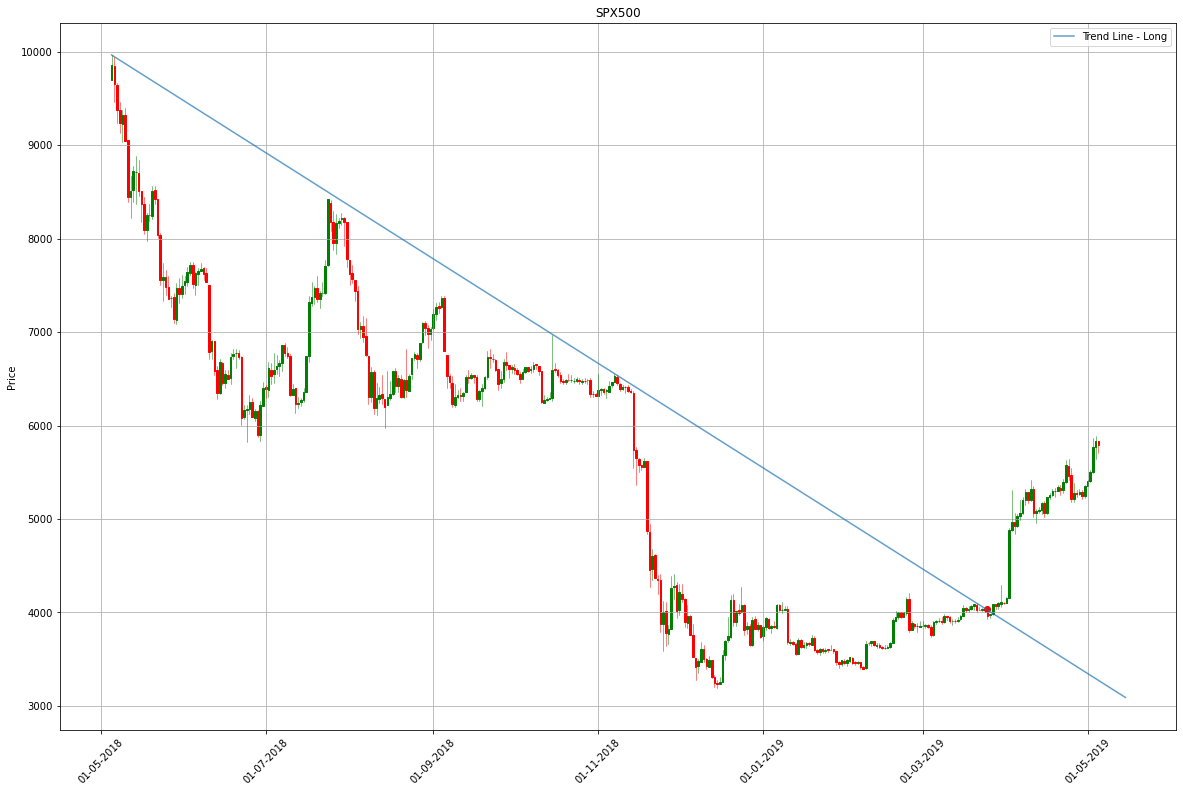

In [84]:
fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)

ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.plot(X_long, Y_long, label='Trend Line - Long', alpha = 0.7)
ax3.scatter(BP[0], BP[1], alpha=1, color = 'red', edgecolors = 'face' )


plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
plt.show()